# Describing the data relatively
---

This worksheet introduces a new library: 

**scipy**

A library of functions for interpolating, optimising, linear regression, etc

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

To determine the most appropriate summaries and uses of the data, we can investigate the data to discover a range of statistical measures over an individual series or a combination of series.  A Linear regression is one such investigation.

Linear regression reports correlation between the values in two series. We will be doing a simplified version of the linear regression we completed using R.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - also known as r^2 - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability that you can reject the null hypothesis (that the 2 variables dont affect each other) and prove statistical significance.   
*  the standard error is in `regression.stderr` and is the average distance of each data point from the line of best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

### Exercise 1 - Clean the data 
---
Using the positive psychology dataset - "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
* Read the data and display info 
* Visually check the summary to see which columns have null values
* Remove columns with a significant number of null values

**Expected Output**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
```

In [149]:
from scipy.stats import linregress
import pandas as pd

url =  "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

# Read the data
pospsych_df = pd.read_csv(url)

# Display info
pospsych_df.info()

# Drop firstlanguage column
pospsych_df = pospsych_df.drop(['firstlanguage'], axis=1)

# Test - display info after dropping
pospsych_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null C

### Exercise 2 - Check for outliers 
---
We briefly mentioned outliers in the R and stats presentation. An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results. 

A value is considered to be an outlier if it is > Q3 + 1.5*IQR or < Q1-1.5*IQR or more than 2 standard deviations from the mean. Q3= value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot.

*(The upper line on the boxplots arm is Q3+1.5*iqr, the lower line is Q1-1.5*iqr, the middle line of the box is the mean and the top of the box is Q3 and the bottom of the box is Q1)

1. Using either matplotlib or seaborn, create a boxplot of `Wellbeing` and a separate boxplot of `selfesteem`
2. use `plt.show()` to separate the graphs 
3. Can you see any outliers? Are they high or low?

**Expected Output**

https://docs.google.com/presentation/d/e/2PACX-1vQBji5MrvtdeXCtP2PJzhPLKqXXuLMYjy4nCIzXpJLoye38IzetN5amZd6pU9e4io3bTUvE6Slg_hIk/pub?start=false&loop=false&delayms=3000


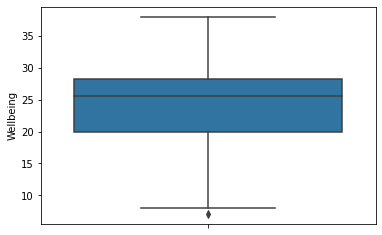

<AxesSubplot:ylabel='selfesteem'>

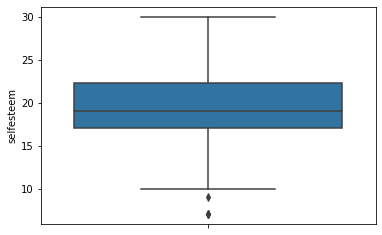

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y="Wellbeing", data=pospsych_df)

plt.show()

sns.boxplot(y="selfesteem", data=pospsych_df)


Low outliers visible on both boxplots.

### Exercise 3 - Removing outliers
---
Create a function called `remove_outliers(df, column)` to remove outliers from a given column in a given dataframe.  Use the function to remove outliers from the `Wellbeing` column.  Then use the function to remove the outliers from the `selfesteem` columns. 

The function will:

1. Store the values for Q1 and Q3 in 2 separate variables   *Hint: you can use `.quantile(0.75)` and `.quantile(0.25)` to get Q3 and Q1 respectively*  
2. Calculate the interquartile range(IQR) using `Q3` - `Q1`  
3. Create a variable which will store the value for the `upper_limit` (`Q3` + 1.5*`IQR`)  
4. Create another variable which assigns the value for the `lower_limit` (`Q1` - 1.5*`IQR`)  
5. Filter all rows where values are NOT outliers into a new dataframe called `df_normal`
6. Return df_normal

Run the function twice, once for each column.
Show the info for the resulting dataframe

**Test output**:  
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          41 non-null     int64  
 1   English      41 non-null     object 
 2   sex          41 non-null     object 
 3   origin       41 non-null     object 
 4   Ukresidence  41 non-null     float64
 5   MAAS         41 non-null     float64
 6   Resilliance  41 non-null     int64  
 7   Wellbeing    41 non-null     int64  
 8   Stress       41 non-null     int64  
 9   selfesteem   41 non-null     int64  
 10  LoC          41 non-null     int64  
 11  sleep        41 non-null     int64  
 12  Year         41 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.5+ KB
```


In [160]:
def remove_outliers(df, column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3 - q1
    upper_limit = (q3 + 1.5*iqr)
    lower_limit = (q1 - 1.5*iqr)
    
    # Use loc to access rows by boolean array
    # Save a group of rows into df_normal (conditional is true for values bigger than lower limit and lower than upper limit)
    df_normal = df.loc[(df[column].values > lower_limit) & (df[column].values < upper_limit)]
    
    return df_normal

df_normal = remove_outliers(pospsych_df, 'Wellbeing')
df_normal.info()

df_normal = remove_outliers(df_normal, 'selfesteem')

df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          43 non-null     int64  
 1   English      43 non-null     object 
 2   sex          43 non-null     object 
 3   origin       43 non-null     object 
 4   Ukresidence  43 non-null     float64
 5   MAAS         43 non-null     float64
 6   Resilliance  43 non-null     int64  
 7   Wellbeing    43 non-null     int64  
 8   Stress       43 non-null     int64  
 9   selfesteem   43 non-null     int64  
 10  LoC          43 non-null     int64  
 11  sleep        43 non-null     int64  
 12  Year         43 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          

### Exercise 4 - Checking for normality
---

Linear regressions assume that the data is normally distributed (Gaussian) and therefore has the bell curved shape and a similar mean and median (this would be true if the mean was centred like it is in Gaussian data). 

1. Use seaborn's distplot to check the shape of the wellbeing and selfesteem columns.  Do they look normally distributed (Gaussian)?

2. Compare the mean and median of `Wellbeing` - are they similar? 
3. Compare the mean and median of `stress` - are they similar?

25.146341463414632

26.0

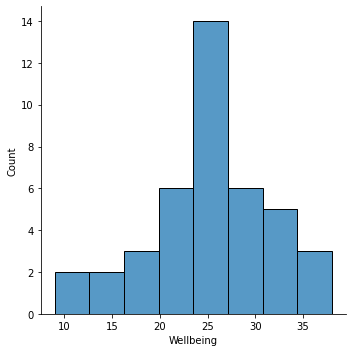

21.195121951219512

21.0

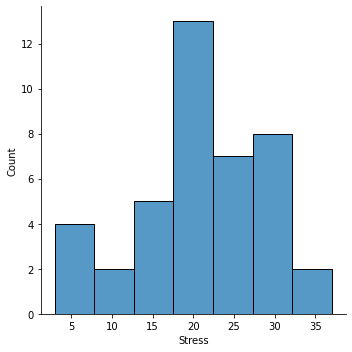

19.902439024390244

20.0

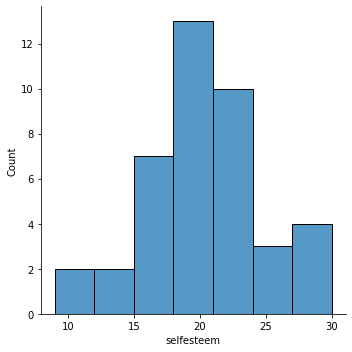

In [167]:
display(df_normal['Wellbeing'].mean())
display(df_normal['Wellbeing'].median())

sns.displot(df_normal['Wellbeing'])

plt.show()

display(df_normal['Stress'].mean())
display(df_normal['Stress'].median())

sns.displot(df_normal['Stress'])

plt.show()

display(df_normal['selfesteem'].mean())
display(df_normal['selfesteem'].median())

sns.displot(df_normal['selfesteem'])

Both wellbeing and stress look normally distributed, although 'Wellbeing' seems closer to the bell curve.
Mean and median in both cases are similar - in case of stress almost exactly the same.

The results are similar when it comes to self-esteem - distribution seems normal, mean and median almost exactly the seme.

### Exercise 5 - Check which variables are most highly correlated
---
Using the dataframe.corr() function and seaborn's heatmap, create a correlation heatmap matrix to check which variables are most highly correlated. 
  
Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated
Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated

1. create the correlation matrix assigning it to a variable using the .corr() function and rounding to 2 decimal places
2. create a heatmap of the correlation matrix using `sns.heatmap`
3. Which variables are the most highly correlated with each other (closest to 1 or -1)?


<AxesSubplot:>

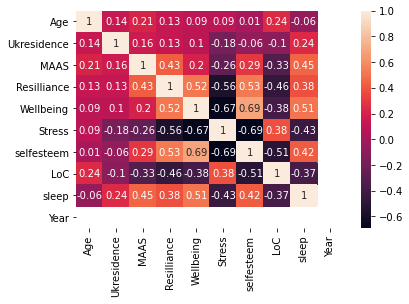

In [162]:
correlation_matrix = df_normal.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

Variables with strongest correlations:

**Positive**:
* Self-esteem and wellbeing (0.69)

**Negative**
* Stress and self-esteem (-0.69)

### Exercise 6 - Linear regression 
---
Using the `linregress` function, perform a linear regression on the Wellbeing and selfesteem columns   
To do this:

1. `from scipy.stats import linregress`
2. create a variable 'x' which stores the Wellbeing column
3. create a variable 'y' which stores the selfesteem column
4. create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
5. display the regression
6. display the slope (regression.slope)
7. display the y-intercept
8. display the r^2 value (rvalue**2)
9. display the pvalue 


In [163]:
from scipy.stats import linregress

x = df_normal['Wellbeing']
y = df_normal['selfesteem']

regression = linregress(x,y)

display(regression, regression.slope, regression.intercept, regression.rvalue, regression.pvalue)

LinregressResult(slope=0.49172610968319524, intercept=7.53732636382014, rvalue=0.6925218140357213, pvalue=5.261854953123173e-07, stderr=0.08202227296197874, intercept_stderr=2.1286898800697713)

0.49172610968319524

7.53732636382014

0.6925218140357213

5.261854953123173e-07

### Exercise 7 - understanding the output 
---
The r^2 value (rvalue**2) helps us understand how much our independent variable (x) is predicting our dependent variable (y). The closer to 1 the rvalue is the more  the change in Y is explained by X. So an rvalue of 0.7 means that 70% of Y's variance can be explained by X. 

Our pvalue shows how significant our model is, if the pvalue is < 0.05 then the model is significant. 

On this basis, write below the findings of the above regression.
* is the model significant?
* how much is the change in y explained by x? 

**Write about the findings here**:

The result is significant.
The change in self-esteem is explained by wellbeing in 69%

### Exercise 8 - Linear regression with other variables 
---

Referring back to the correlation heatmap..  
Repeat exercise 6 but with the variables that were the most highly correlated according to the heatmap.   
* write a comment comparing the results of this regression with the one you created in exercise 6

In [164]:
x = df_normal['Stress']
y = df_normal['selfesteem']

regression = linregress(x,y)

display(regression, regression.slope, regression.intercept, regression.rvalue, regression.pvalue)

LinregressResult(slope=-0.40127090301003343, intercept=28.40742474916388, rvalue=-0.6946963918258077, pvalue=4.68455338683681e-07, stderr=0.06653072306438873, intercept_stderr=1.5046652294767202)

-0.40127090301003343

28.40742474916388

-0.6946963918258077

4.68455338683681e-07

**Comment here**: 

The model is significant, r-value -0.66

The change in self-esteem is explained by stress in 69%, so the same as wellbeing.

### Exercise 9 - Plotting a line of best fit 
---
To create a line of best fit we use y = slope\*x + intercept. 

Using matplotlib (dont forget to import it):

* create a scatter graph between Wellbeing and selfesteem 
* plot a line of best fit using the results in exercise 6  (y = slope * x + intercept)  

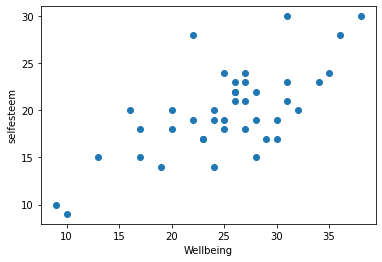

<AxesSubplot:xlabel='Wellbeing', ylabel='selfesteem'>

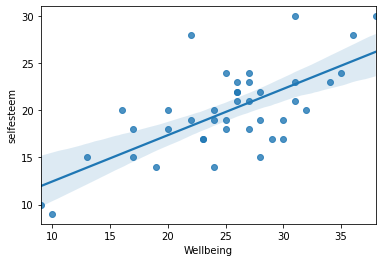

In [165]:
import matplotlib.pyplot as plt

x = df_normal['Wellbeing']
y = df_normal['selfesteem']

plt.scatter(x,y)

plt.xlabel('Wellbeing') 
plt.ylabel('selfesteem')
plt.show()

sns.regplot(y='selfesteem', x='Wellbeing', data=df_normal)

### Exercise 10 - using seaborn to plot a regression line 
---

Use seaborns regplot function to create a scatter graph with line of best fit of the variables you used in exercise 8.

* Compare the 'Wellbeing' and 'selfesteem' graph to the graph you created in exercise 9

<AxesSubplot:xlabel='Wellbeing', ylabel='Stress'>

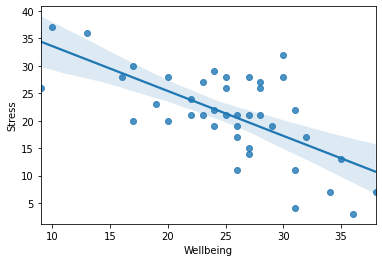

In [166]:
sns.regplot(y='Stress', x='Wellbeing', data=df_normal)

The slope is similar in both cases, but in case of the relation betweem self-esteem and and wellbeing, the values of one grow with the other as the correlation is positive. Contrary, in the case of stress and wellbeing, when wellbeing is better (grows), the values of stress are getting lower, as the correlation is negative. 

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Ability to read data into a dataframe, clean and wrangle it.

Ability to perform linear regression, understand and visualise the results.

Ability to use scipy library functions.

Ability to follow instructions and write code to specifications.

Problem-solving.

## What caused you the most difficulty?

No difficulties.